In [9]:
#import files
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

#File to be loaded 
carbon_emissions = Path("../Project_4/Resources/Carbon_Emission.csv")

#Read in data file and convert to pandas DF
carbon_emissions_df = pd.read_csv(carbon_emissions)

carbon_emissions_df.head()

,Body Type,Sex,Diet,How Often Shower,Heating Energy Source,Transport,Vehicle Type,Social Activity,Monthly Grocery Bill,Frequency of Traveling by Air,Vehicle Monthly Distance Km,Waste Bag Size,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,Energy efficiency,Recycling,Cooking_With,CarbonEmission
0,overweight,female,pescatarian,daily,coal,public,NaN,often,230,frequently,210,large,4,7,26,1,No,['Metal'],"['Stove', 'Oven']",2238
1,obese,female,vegetarian,less frequently,natural gas,walk/bicycle,NaN,often,114,rarely,9,extra large,3,9,38,5,No,['Metal'],"['Stove', 'Microwave']",1892
2,overweight,male,omnivore,more frequently,wood,private,petrol,never,138,never,2472,small,1,14,47,6,Sometimes,['Metal'],"['Oven', 'Microwave']",2595
3,overweight,male,omnivore,twice a day,wood,walk/bicycle,NaN,sometimes,157,rarely,74,medium,3,20,5,7,Sometimes,"['Paper', 'Plastic', 'Glass', 'Metal']","['Microwave', 'Grill', 'Airfryer']",1074
4,obese,female,vegetarian,daily,coal,private,diesel,often,266,very frequently,8457,large,1,3,5,6,Yes,['Paper'],['Oven'],4743


In [27]:
#Drop unnecessary columns 
carbon_clean_df = carbon_emissions_df.drop(['Vehicle Type'], axis=1)
carbon_clean_df.head()


,Body Type,Sex,Diet,How Often Shower,Heating Energy Source,Transport,Social Activity,Monthly Grocery Bill,Frequency of Traveling by Air,Vehicle Monthly Distance Km,Waste Bag Size,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,Energy efficiency,Recycling,Cooking_With,CarbonEmission
0,overweight,female,pescatarian,daily,coal,public,often,230,frequently,210,large,4,7,26,1,No,['Metal'],"['Stove', 'Oven']",2238
1,obese,female,vegetarian,less frequently,natural gas,walk/bicycle,often,114,rarely,9,extra large,3,9,38,5,No,['Metal'],"['Stove', 'Microwave']",1892
2,overweight,male,omnivore,more frequently,wood,private,never,138,never,2472,small,1,14,47,6,Sometimes,['Metal'],"['Oven', 'Microwave']",2595
3,overweight,male,omnivore,twice a day,wood,walk/bicycle,sometimes,157,rarely,74,medium,3,20,5,7,Sometimes,"['Paper', 'Plastic', 'Glass', 'Metal']","['Microwave', 'Grill', 'Airfryer']",1074
4,obese,female,vegetarian,daily,coal,private,often,266,very frequently,8457,large,1,3,5,6,Yes,['Paper'],['Oven'],4743


In [59]:
#Male data
male_emissions = carbon_emissions_df[carbon_emissions_df['Sex'] == 'male']

male_avg = male_emissions.groupby('Sex')['CarbonEmission'].mean()
male_avg

Sex
male    2436.16443
Name: CarbonEmission, dtype: float64

In [60]:
#Female data
female_emissions = carbon_emissions_df[carbon_emissions_df['Sex'] == 'female']

female_avg = female_emissions.groupby('Sex')['CarbonEmission'].mean()
female_avg

Sex
female    2102.597164
Name: CarbonEmission, dtype: float64

In [29]:
#use value count to determine count of each value 
carbon_emissions_df['Sex'].value_counts()

Sex
female    5007
male      4993
Name: count, dtype: int64

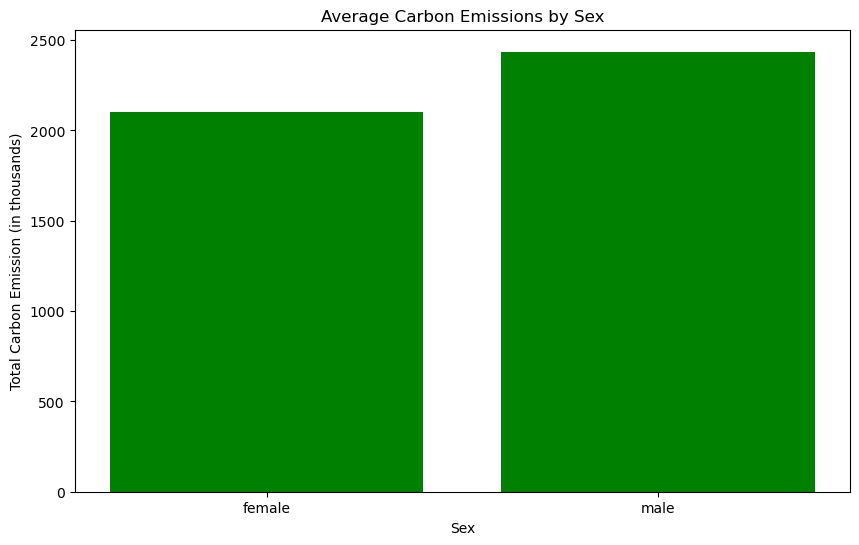

In [55]:
import matplotlib.ticker as ticker

#bar chart for avg carbon emissions by gender
sex_avg = carbon_clean_df.groupby('Sex')['CarbonEmission'].mean()
sex_avg

fig, ax = plt.subplots(figsize=(10,6))
ax.bar(sex_avg.index, sex_avg.values, color='green')


plt.title('Average Carbon Emissions by Sex')
plt.xlabel('Sex')
plt.ylabel('Total Carbon Emission (in thousands)')
plt.show()

<Axes: title={'center': 'Average Carbon Emissions by Sex'}, ylabel='CarbonEmission'>

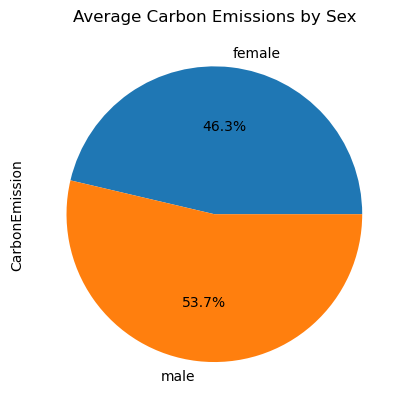

In [48]:
#pie chart for avg carbon emissions by gender
gender_pie = sex_avg.plot.pie(y='sex', title="Average Carbon Emissions by Sex", autopct='%1.1f%%')
gender_pie

<Axes: title={'center': 'Vehicle Monthly Distance Km'}, ylabel='Vehicle Monthly Distance Km'>

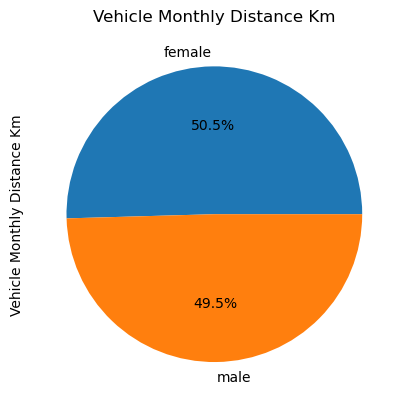

In [50]:
#pie chart Vehicle Monthly Distance Km
vehicle_avg = carbon_clean_df.groupby('Sex')['Vehicle Monthly Distance Km'].mean()
vehicle_avg

vehicle_pie = vehicle_avg.plot.pie(y='sex', title="Vehicle Monthly Distance Km", autopct='%1.1f%%')
vehicle_pie

In [84]:
# Step 1: Calculate the quantiles
quantile_25 = carbon_clean_df['CarbonEmission'].quantile(0.25)
quantile_75 = carbon_clean_df['CarbonEmission'].quantile(0.75)

# Step 2: Define a function to classify each person's carbon emission status
def classify_emission(emission):
    if emission <= quantile_25:
        return 'Good'
    elif emission >= quantile_75:
        return 'Bad'
    else:
        return 'Average'

# Apply the function to the 'CarbonEmission' column to create a new 'EmissionStatus' column
carbon_clean_df['EmissionStatus'] = carbon_clean_df['CarbonEmission'].apply(classify_emission)

# Now 'df' includes a new column 'EmissionStatus' with the classification based on carbon emission

carbon_clean_df 


,Body Type,Sex,Diet,How Often Shower,Heating Energy Source,Transport,Social Activity,Monthly Grocery Bill,Frequency of Traveling by Air,Vehicle Monthly Distance Km,Waste Bag Size,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,Energy efficiency,Recycling,Cooking_With,CarbonEmission,EmissionStatus
0,overweight,female,pescatarian,daily,coal,public,often,230,frequently,210,large,4,7,26,1,No,['Metal'],"['Stove', 'Oven']",2238,Average
1,obese,female,vegetarian,less frequently,natural gas,walk/bicycle,often,114,rarely,9,extra large,3,9,38,5,No,['Metal'],"['Stove', 'Microwave']",1892,Average
2,overweight,male,omnivore,more frequently,wood,private,never,138,never,2472,small,1,14,47,6,Sometimes,['Metal'],"['Oven', 'Microwave']",2595,Average
3,overweight,male,omnivore,twice a day,wood,walk/bicycle,sometimes,157,rarely,74,medium,3,20,5,7,Sometimes,"['Paper', 'Plastic', 'Glass', 'Metal']","['Microwave', 'Grill', 'Airfryer']",1074,Good
4,obese,female,vegetarian,daily,coal,private,often,266,very frequently,8457,large,1,3,5,6,Yes,['Paper'],['Oven'],4743,Bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,obese,male,omnivore,twice a day,coal,private,sometimes,230,never,268,medium,5,12,27,9,Yes,[],['Microwave'],2408,Average
9996,normal,female,vegan,twice a day,coal,private,never,234,frequently,5316,extra large,3,14,8,24,Sometimes,"['Paper', 'Plastic']","['Stove', 'Microwave']",3084,Bad
9997,overweight,female,vegetarian,daily,electricity,walk/bicycle,sometimes,298,very frequently,96,extra large,5,11,5,24,Yes,"['Paper', 'Plastic', 'Metal']","['Microwave', 'Grill', 'Airfryer']",2377,Average
9998,underweight,male,vegan,more frequently,coal,private,often,179,rarely,8688,medium,5,19,14,5,Sometimes,"['Paper', 'Metal']","['Stove', 'Microwave', 'Grill', 'Airfryer']",4574,Bad


In [86]:
#Female data
female_emissions_status = carbon_clean_df[carbon_clean_df['Sex'] == 'female']
female_emissions_status.head()


,Body Type,Sex,Diet,How Often Shower,Heating Energy Source,Transport,Social Activity,Monthly Grocery Bill,Frequency of Traveling by Air,Vehicle Monthly Distance Km,Waste Bag Size,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,Energy efficiency,Recycling,Cooking_With,CarbonEmission,EmissionStatus
0,overweight,female,pescatarian,daily,coal,public,often,230,frequently,210,large,4,7,26,1,No,['Metal'],"['Stove', 'Oven']",2238,Average
1,obese,female,vegetarian,less frequently,natural gas,walk/bicycle,often,114,rarely,9,extra large,3,9,38,5,No,['Metal'],"['Stove', 'Microwave']",1892,Average
4,obese,female,vegetarian,daily,coal,private,often,266,very frequently,8457,large,1,3,5,6,Yes,['Paper'],['Oven'],4743,Bad
6,underweight,female,vegan,less frequently,wood,private,never,56,rarely,5363,medium,4,9,11,19,Sometimes,[],"['Grill', 'Airfryer']",1832,Average
7,underweight,female,vegan,more frequently,coal,walk/bicycle,sometimes,59,very frequently,54,extra large,3,5,39,15,No,"['Paper', 'Plastic', 'Glass']","['Stove', 'Microwave']",2322,Average


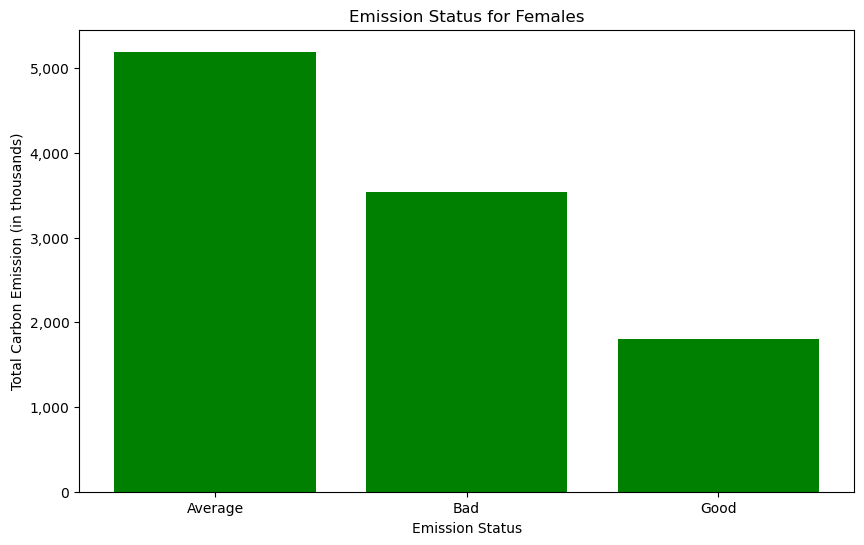

In [92]:
# Group the data by 'Diet' and calculate the total 'CarbonEmission' for each group
female_grouped = female_emissions_status.groupby('EmissionStatus')['CarbonEmission'].sum()

# Create a bar plot
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(female_grouped.index, female_grouped.values, color='green')

# # Format y-axis to display in thousands
formatter = ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000))
ax.yaxis.set_major_formatter(formatter)

plt.title('Emission Status for Females')
plt.xlabel('Emission Status')
plt.ylabel('Total Carbon Emission (in thousands)')
plt.show()

In [93]:
#male data
male_emissions_status = carbon_clean_df[carbon_clean_df['Sex'] == 'male']
male_emissions_status.head()


,Body Type,Sex,Diet,How Often Shower,Heating Energy Source,Transport,Social Activity,Monthly Grocery Bill,Frequency of Traveling by Air,Vehicle Monthly Distance Km,Waste Bag Size,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,Energy efficiency,Recycling,Cooking_With,CarbonEmission,EmissionStatus
2,overweight,male,omnivore,more frequently,wood,private,never,138,never,2472,small,1,14,47,6,Sometimes,['Metal'],"['Oven', 'Microwave']",2595,Average
3,overweight,male,omnivore,twice a day,wood,walk/bicycle,sometimes,157,rarely,74,medium,3,20,5,7,Sometimes,"['Paper', 'Plastic', 'Glass', 'Metal']","['Microwave', 'Grill', 'Airfryer']",1074,Good
5,overweight,male,vegetarian,less frequently,wood,public,sometimes,144,frequently,658,large,1,22,18,9,Sometimes,"['Paper', 'Glass', 'Metal']","['Stove', 'Oven', 'Microwave']",1647,Average
8,overweight,male,omnivore,daily,wood,public,never,200,frequently,1376,medium,3,3,31,15,Yes,['Glass'],"['Microwave', 'Grill', 'Airfryer']",2494,Average
11,obese,male,vegetarian,more frequently,coal,walk/bicycle,never,111,very frequently,69,medium,5,9,4,4,Sometimes,[],"['Stove', 'Oven', 'Microwave']",3226,Bad


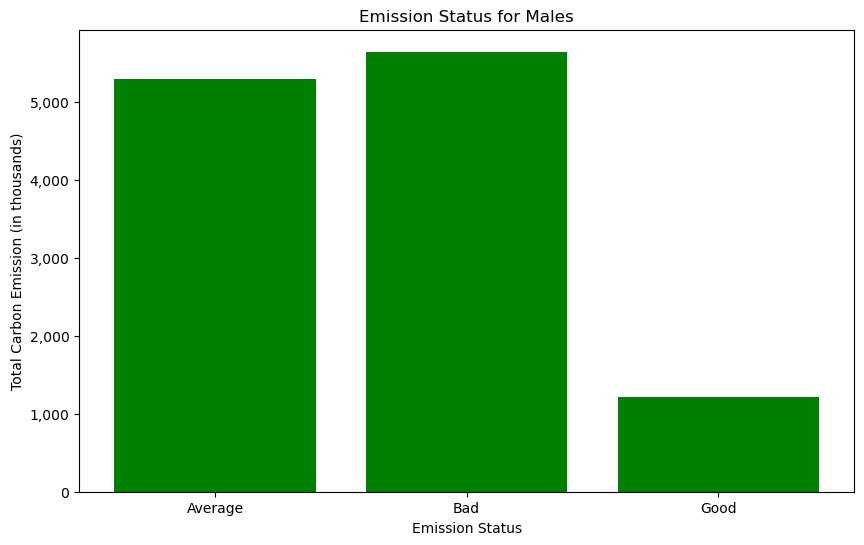

In [94]:
# Group the data by 'Diet' and calculate the total 'CarbonEmission' for each group
male_grouped = male_emissions_status.groupby('EmissionStatus')['CarbonEmission'].sum()

# Create a bar plot
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(male_grouped.index, male_grouped.values, color='green')

# # Format y-axis to display in thousands
formatter = ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000))
ax.yaxis.set_major_formatter(formatter)

plt.title('Emission Status for Males')
plt.xlabel('Emission Status')
plt.ylabel('Total Carbon Emission (in thousands)')
plt.show()